In [1]:
import copy
import numpy as np
import os
import verdict

/home1/03057/zhafen/.local/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import matplotlib
import matplotlib.pyplot as plt

In [3]:
import galaxy_dive.read_data.metafile as read_metafile
import galaxy_dive.plot_data.plotting as plotting
import galaxy_dive.utils.utilities as utilities
import galaxy_dive.utils.executable_helpers as exec_helpers

In [4]:
import linefinder.utils.file_management as file_management
import linefinder.analyze_data.worldline_set as worldline_set
import linefinder.analyze_data.worldlines as worldlines
import linefinder.utils.presentation_constants as p_constants
import linefinder.config as l_config

In [5]:
import analysis_config

# Load Data

In [6]:
do_calculation = False

In [7]:
snum, galdef = exec_helpers.choose_config_or_commandline(
    [ analysis_config.SNUM, analysis_config.GALDEF ]
)
print( 'Using snum {}, galdef {}'.format( snum, galdef ) )

Using snum 465, galdef _galdefv3


In [8]:
presentation_figure = False

In [9]:
mass_key = 'M'

In [10]:
save_file_tags = {
    'M' : 'mass',
    'metal_mass' : 'metalmass',
    'enriched_metal_mass' : 'enrichedmetalmass',
}

In [11]:
axes_labels = {
    'M' : 'Mass',
    'metal_mass' : 'Metal Mass',
    'enriched_metal_mass' : 'Metal Mass',
}

In [12]:
file_manager = file_management.FileManager( project='CGM_origin' )

In [13]:
ind = 600 - snum

In [14]:
tag_tail = '_CGM_snum{}'.format( snum )

In [15]:
defaults, variations = file_manager.get_linefinder_analysis_defaults_and_variations(
    tag_tail,
    sim_names = analysis_config.SIM_NAMES,
    galdef = galdef,
)
defaults, variations

({'ahf_index': 600,
  'data_dir': '/scratch/03057/zhafen/linefinder_data/core/m12i_res7100/data',
  'halo_data_dir': '/scratch/03057/zhafen/core/m12i_res7100/halo',
  'ids_tag': 'm12i_CGM_snum465',
  'main_halo_id': 0,
  'ptracks_tag': 'm12i_CGM_snum465',
  'tag': 'm12i_CGM_snum465_galdefv3'},
 {'m10q': {'ahf_index': 600,
   'data_dir': '/scratch/03057/zhafen/linefinder_data/core/m10q_res250/data',
   'halo_data_dir': '/scratch/03057/zhafen/core/m10q_res250/halo',
   'ids_tag': 'm10q_CGM_snum465',
   'main_halo_id': 0,
   'ptracks_tag': 'm10q_CGM_snum465',
   'tag': 'm10q_CGM_snum465_galdefv3'},
  'm10v': {'ahf_index': 600,
   'data_dir': '/scratch/03057/zhafen/linefinder_data/core/m10v_res250/data',
   'halo_data_dir': '/scratch/03057/zhafen/core/m10v_res250/halo',
   'ids_tag': 'm10v_CGM_snum465',
   'main_halo_id': 2,
   'ptracks_tag': 'm10v_CGM_snum465',
   'tag': 'm10v_CGM_snum465_galdefv3'},
  'm10y': {'ahf_index': 600,
   'data_dir': '/scratch/03057/zhafen/linefinder_data/core/m

In [16]:
w_set = worldline_set.WorldlineSet( defaults, variations )

In [17]:
default_sim_name = w_set.keys()[0]

In [18]:
w = w_set[default_sim_name]

In [19]:
classifications = p_constants.CLASSIFICATIONS_CGM_ORIGIN
classifications.append( 'is_in_CGM' )

In [20]:
metafile_reader = read_metafile.MetafileReader(
    file_manager.get_metafile_dir( default_sim_name )
)

In [21]:
w_set['m12i'].classifications.parameters

Attribute classifications not found in plotting object. Checking data object.


{u'absolute_wind_cut': 15.0,
 u'classifications_to_save': array(['is_unaccreted', 'is_pristine', 'is_preprocessed', 'is_merger',
        'is_mass_transfer', 'is_wind', 'is_hitherto_EP', 'is_hitherto_NEP',
        'is_unaccreted_EP', 'is_unaccreted_NEP'], dtype='|S17'),
 u'events_to_save': array(['is_in_other_gal', 'is_in_main_gal', 'is_accreted', 'is_ejected',
        'redshift_first_acc', 'ind_first_acc',
        'cumulative_time_in_other_gal', 'gal_event_id',
        'time_in_other_gal_before_acc_during_interval'], dtype='|S44'),
 u'galids_tag': 'm12i_CGM_snum465_galdefv3',
 u'halo_data_dir': '/scratch/03057/zhafen/core/m12i_res7100/halo',
 u'halo_file_tag': 'smooth',
 u'main_halo_robustness_criteria': 'n_star',
 u'main_halo_robustness_value': 100,
 u'min_gal_density': 0.173,
 u'mtree_halos_index': 'None',
 u'neg': 10,
 u'not_in_main_gal_key': 'gal_id',
 u'out_dir': '/scratch/03057/zhafen/linefinder_data/core/m12i_res7100/data',
 u'pp_classifications_to_save': array(['is_in_CGM', 'is

# Analyze Data

### Get masses out

In [22]:
w_set.data_object.data_masker.clear_masks()

Dict, {
'm10q' : None,
'm10v' : None,
'm11e_md' : None,
'm10z' : None,
'm11v' : None,
'm11q' : None,
'm10y' : None,
'm12r_md' : None,
'm12f' : None,
'm11i_md' : None,
'm11h_md' : None,
'm12m' : None,
'm11a' : None,
'm12i' : None,
'm11c' : None,
'm11b' : None,
'm12b_md' : None,
'm12z_md' : None,
'm12w_md' : None,
'm11d_md' : None,
'm12c_md' : None,
}

#### Mass Fractions

In [23]:
if do_calculation:
    CGM_mass_fractions = w_set.data_object.get_categories_selected_quantity_fraction(
        normalization_category = 'is_in_CGM',
        selection_routine = 'ptype',
        ptype = 'gas',
        classification_list = classifications,
        sl = (slice(None),ind),
        selected_quantity_data_key = mass_key,
    )

    CGM_mass_fractions = CGM_mass_fractions.transpose()

#### Halo Masses

In [24]:
w_set.data_object.halo_data.get_mt_data( 'Mvir', snums=[ snum ], )

Dict, {
'm10q' : array([5.26485e+09]),
'm10v' : array([4.77105e+09]),
'm11e_md' : array([9.52627e+10]),
'm10z' : array([2.60301e+10]),
'm11v' : array([6.8342e+10]),
'm11q' : array([1.03294e+11]),
'm10y' : array([9.5531e+09]),
'm12r_md' : array([4.68842e+11]),
'm12f' : array([1.0453e+12]),
'm11i_md' : array([4.74179e+10]),
'm11h_md' : array([1.19446e+11]),
'm12m' : array([9.20613e+11]),
'm11a' : array([2.67745e+10]),
'm12i' : array([7.18814e+11]),
'm11c' : array([9.31717e+10]),
'm11b' : array([2.80626e+10]),
'm12b_md' : array([8.94511e+11]),
'm12z_md' : array([4.67852e+11]),
'm12w_md' : array([6.08154e+11]),
'm11d_md' : array([1.61895e+11]),
'm12c_md' : array([5.52568e+11]),
}

In [25]:
if do_calculation:
    w_set.data_object.retrieve_halo_data()
    halo_masses = w_set.m_vir.inner_item( snum )

#### Save and load results

In [26]:
savefile = os.path.join(
    file_manager.project_parameters['output_data_dir'],
    'cgm_origins_{}_frac_snum{}.hdf5'.format( save_file_tags[mass_key], snum ),
)

In [27]:
if do_calculation:

    # Format results to save
    results_to_save = copy.deepcopy( CGM_mass_fractions )
    results_to_save['m_vir'] = halo_masses

    results_to_save.to_hdf5(
        savefile, 
        condensed = True, 
        attributes = { 'redshift': w.redshift.values[ind] },
    )
    
    redshift = w.redshift.values[ind]

In [28]:
if not do_calculation:
    results_to_load, attributes = verdict.Dict.from_hdf5( savefile, unpack=True )
    
    halo_masses = results_to_load['m_vir']
    CGM_mass_fractions = copy.deepcopy( results_to_load )
    del CGM_mass_fractions['m_vir']
    
    redshift = attributes['redshift']

# Plot Data

## Setup

In [29]:
mass_range = [ halo_masses.array().min()/1.5, halo_masses.array().max()*1.5 ]
mass_range

[4999857549.857551, 2233547008547.009]

In [30]:
m_vir_md_split = halo_masses.split_by_key_slice( slice(4,10), '_md' )
m_vir_fiducials = m_vir_md_split[False]
m_vir_mds = m_vir_md_split[True]

In [31]:
def save_plot_stage( fig, base_save_file, index ):

    save_file = '{}.{}.pdf'.format( base_save_file, index )
    
    plotting.save_fig(
        out_dir = file_manager.get_project_presentation_dir(),
        save_file = save_file,
        fig = fig,
    )
    
    return index + 1

## Mass Fraction Plot

File saved at /home1/03057/zhafen/papers/CGM_origin/figures/CGM_mass_frac_vs_Mh_CGM_snum465.pdf


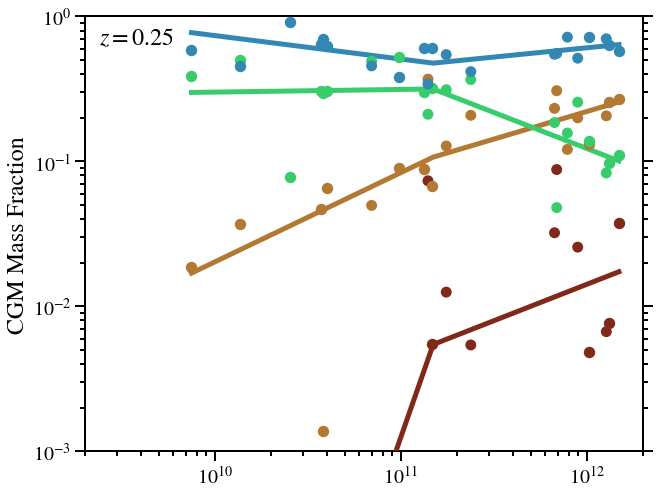

In [32]:
fig = plt.figure( figsize=(10,8), facecolor='w' )
ax = plt.gca()

# Some plot settings
y_min = 1e-3
y_max = 1
alpha = 1.0

# Plot data points
color_objects = []
labels = []
j = 0
for k, classification in enumerate( p_constants.CLASSIFICATIONS_CGM_ORIGIN ):
    
    if presentation_figure:
                
        j = save_plot_stage( fig, 'CGM_{}_frac_vs_Mh{}'.format( save_file_tags[mass_key], tag_tail ), j )
    
    if classification == 'is_in_CGM':
        continue
        
    item = CGM_mass_fractions[classification]
    
    md_split = item.split_by_key_slice( slice(4,10), '_md' )
    fiducials = md_split[False]
    mds = md_split[True]
    
    edgecolor = np.array( matplotlib.colors.colorConverter.to_rgba(
        l_config.COLORSCHEME[classification]
    ) )
    edgecolor[-1] = alpha
        
    # Default points
    ax.scatter(
        m_vir_fiducials.array(),
        fiducials.array(),
        s = 130,
        color = None,
        zorder = 100 - k,
        linewidth = 0,
        facecolors = l_config.COLORSCHEME[classification],
        alpha = alpha,
    )
    
    if mass_key != 'M':
        facecolors = 'none'
        color = edgecolor
    else:
        facecolors = l_config.COLORSCHEME[classification]
        color = 'none'
        
    # Turbulent metal diffusion
    ax.scatter(
        m_vir_mds.array(),
        mds.array(),
        s = 120,
        color = color,
        marker = 'o',
        zorder = 100 - k,
        facecolors = facecolors,
        linewidth = 3.5,
        alpha = alpha,
    )
    
    # Box plot
    if mass_key != 'M':
        x_data_list = [ m_vir_fiducials, m_vir_mds, ]
        y_data_list = [ fiducials, mds, ]
        linestyles = [ '-', '--', ]
    else:
        x_data_list = [ halo_masses, ]
        y_data_list = [ item, ]
        linestyles = [ '-', ]
    for x_data, y_data, linestyle in zip( x_data_list, y_data_list, linestyles ):
        x_datas = x_data.split_by_dict( l_config.MASS_BINS, return_list=True )
        y_datas = y_data.split_by_dict( l_config.MASS_BINS, return_list=True )
        plotting.box_plot(
            x_datas,
            y_datas,
            ax = ax,
            color = l_config.COLORSCHEME[classification],
            box_zorder = 50 - k,
            blank_zorder = 30 - k,
            line_zorder = 10 - k,
    #         linewidth = 7 - k,
            linewidth = 5,
            linestyle = linestyle,
            y_floor = 1e-5,
            plot_boxes = False,
            line_x_min = x_data.array().min(),
            line_x_max = x_data.array().max(),
            y_mean_statistic = np.median,
        )
    
    if classification is not None:
        # Make virtual artists to allow a legend to appear
        color_object = matplotlib.patches.Rectangle(                         
            (0, 0),                                                          
            1,                                                               
            1,                                                               
            fc = l_config.COLORSCHEME[classification],                                 
            ec = l_config.COLORSCHEME[classification],                                 
            alpha = p_constants.CLASSIFICATION_ALPHA,                        
        )
        color_objects.append( color_object )                                 
        labels.append( p_constants.CLASSIFICATION_LABELS[classification] )

    # Add a redshift label
    if k == 0:
        redshift_label = r'$z=' + '{:.02g}'.format( redshift ) + '$'
        if snum == 465:
            ax.annotate(
                s=redshift_label,
                xy=(0.025, 0.975),
                ha = 'left',
                va = 'top',
                xycoords='axes fraction',
                fontsize=24
            )
        elif snum == 172:
            ax.annotate(
                s=redshift_label,
                xy=(0.975, 0.975),
                ha = 'right',
                va = 'top',
                xycoords='axes fraction',
                fontsize=24
            )

    if snum == 172:
        ax.set_xlabel( r'$M_{\rm h}$ ($M_{\odot}$)', fontsize=24 )
    ax.set_ylabel( r'CGM {} Fraction'.format( axes_labels[mass_key] ), fontsize=24 )

    ax.set_xlim( 2e9, 2e12 )
    ax.set_ylim( y_min, y_max )

    ax.set_xscale( 'log' )
    ax.set_yscale( 'log' )
    
    # Add ticks to the righ
    ax.yaxis.set_ticks_position( 'both' )

    if snum == 172:
        legend = ax.legend(
            color_objects,
            labels,
            prop={'size': 17.5},
            ncol=1,
            loc='lower right',
            fontsize=24,
            framealpha = 0.9,
        )
        legend.set_zorder( 120 )

save_file = 'CGM_{}_frac_vs_Mh{}.pdf'.format( save_file_tags[mass_key], tag_tail )

plotting.save_fig(
    out_dir = file_manager.get_project_figure_dir(),
    save_file = save_file,
    fig = fig,
)

In [33]:
import os

import py2tex.py2tex as py2tex

In [34]:
tex_filepath = os.path.join( file_manager.project_parameters['project_dir'], 'variables.tex' )

In [35]:
tex_file = py2tex.TeXVariableFile( tex_filepath )

In [36]:
# Used for variable names
if snum == 465:
    regime = 'low'
if snum == 172:
    regime = 'high'

### IGM Accretion

In [37]:
if mass_key == 'M':
    nep = utilities.SmartDict( CGM_mass_fractions['is_CGM_IGM_accretion'] )

    nep_mean = nep.array().mean()

    tex_file.save_variable(
        'fracnepmean{}'.format( regime ),
        py2tex.to_tex_percentage( nep_mean, 5, nearest_base=True ),
    )

    sub_nep = nep.split_by_dict( l_config.MASS_BINS )

    for mass_bin, name in zip( ['m10', 'm11', 'm12' ], ['dwarf', 'subMW', 'MW'] ):
        nep_mean = sub_nep[mass_bin].array().mean()

        tex_file.save_variable(
            'fracnep{}mean{}'.format( name, regime ),
            py2tex.to_tex_percentage( nep_mean, 5, False, nearest_base=True ),
        )

Saving 60\% as fracnepmeanlow
Saving 65 as fracnepdwarfmeanlow
Saving 50 as fracnepsubMWmeanlow
Saving 60 as fracnepMWmeanlow


In [38]:
if mass_key == 'enriched_metal_mass':
    
    nep = CGM_mass_fractions['is_CGM_IGM_accretion']
    
    nep_split = nep.split_by_key_slice( slice(4,10), '_md' )
    nep_f = nep_split[False]
    nep_md = nep_split[True]
    
    nep_mean = nep_f.array().mean()    
    tex_file.save_variable(
        'fracnepmetalmean{}'.format( regime ),
        py2tex.to_tex_percentage( nep_mean, 1, False ),
    )
    
    nep_mean_md_m12 = nep_md.split_by_dict( l_config.MASS_BINS )['m12'].array().mean()    
    tex_file.save_variable(
        'fracnepmetalmeanmdMW{}'.format( regime ),
        py2tex.to_tex_percentage( nep_mean_md_m12, 5, False, nearest_base=True ),
    )

### Wind

In [39]:
if mass_key == 'M':
    wind = utilities.SmartDict( CGM_mass_fractions['is_CGM_wind'] )

    sub_wind = wind.split_by_dict( l_config.MASS_BINS )

    less_mass_wind_mean = 0.5*( sub_wind['m11'].array().mean() + sub_wind['m10'].array().mean() )

    tex_file.save_variable(
        'fraclessmasswindmean{}'.format( regime ),
        py2tex.to_tex_percentage( less_mass_wind_mean, 0 )
    )

    tex_file.save_variable(
        'fracMWwindmean{}'.format( regime ),
        py2tex.to_tex_percentage( sub_wind['m12'].array().mean(), 5, nearest_base=True )
    )

Saving 30\% as fraclessmasswindmeanlow
Saving 15\% as fracMWwindmeanlow


In [40]:
if mass_key == 'enriched_metal_mass':
    
    wind = utilities.SmartDict( CGM_mass_fractions['is_CGM_wind'] )
    
    wind_split = wind.split_by_key_slice( slice(4,10), '_md' )
    wind_f = wind_split[False]
    wind_md = wind_split[True]
    
    tex_file.save_variable(
        'fracwindmetalmean{}'.format( regime ),
        py2tex.to_tex_percentage( wind.array().mean(), 5, nearest_base=True )
    )
    
    tex_file.save_variable(
        'fracwindmetalmeanmd{}'.format( regime ),
        py2tex.to_tex_percentage( wind_md.array().mean(), 5, False, nearest_base=True )
    )
    
    tex_file.save_variable(
        'fracwindmetalmeanf{}'.format( regime ),
        py2tex.to_tex_percentage( wind_f.array().mean(), 5, False, nearest_base=True )
    )
    
    tex_file.save_variable(
        'fracwindmetalmedian{}'.format( regime ),
        py2tex.to_tex_percentage( np.median( wind.array() ), 5, nearest_base=True )
    )
    
    tex_file.save_variable(
        'fracwindmetalmedianmd{}'.format( regime ),
        py2tex.to_tex_percentage( np.median( wind_md.array() ), 5, False, nearest_base=True )
    )
    
    tex_file.save_variable(
        'fracwindmetalmedianf{}'.format( regime ),
        py2tex.to_tex_percentage( np.median( wind_f.array() ), 5, False, nearest_base=True )
    )

### Satellite Wind

In [41]:
if mass_key == 'M':
    wind = utilities.SmartDict( CGM_mass_fractions['is_CGM_satellite_wind'] )

    sub_wind = wind.split_by_dict( l_config.MASS_BINS )

    less_mass_wind_max = np.max( [sub_wind['m10'].array().max(), sub_wind['m11'].array().max(), ])

    tex_file.save_variable(
        'fraclessmasssatwindmax{}'.format( regime ),
        py2tex.to_tex_percentage( less_mass_wind_max, 5, nearest_base=True )
    )

    tex_file.save_variable(
        'fracMWsatwindmean{}'.format( regime ),
        py2tex.to_tex_percentage( sub_wind['m12'].array().mean(), 5, nearest_base=True )
    )

Saving 35\% as fraclessmasssatwindmaxlow
Saving 20\% as fracMWsatwindmeanlow


In [42]:
if mass_key == 'enriched_metal_mass':
    
    wind = utilities.SmartDict( CGM_mass_fractions['is_CGM_satellite_wind'] )
    
    wind_split = wind.split_by_key_slice( slice(4,10), '_md' )
    wind_f = wind_split[False]
    wind_md = wind_split[True]
    
    tex_file.save_variable(
        'fracsatwindmetalmean{}'.format( regime ),
        py2tex.to_tex_percentage( wind.array().mean(), 5, nearest_base=True )
    )
    
    tex_file.save_variable(
        'fracsatwindmetalmeanmd{}'.format( regime ),
        py2tex.to_tex_percentage( wind_md.array().mean(), 5, False, nearest_base=True )
    )
    
    tex_file.save_variable(
        'fracsatwindmetalmeanf{}'.format( regime ),
        py2tex.to_tex_percentage( wind_f.array().mean(), 5, False, nearest_base=True )
    )

### Satellites

In [43]:
if mass_key == 'M':
    sat = utilities.SmartDict( CGM_mass_fractions['is_CGM_satellite_ISM'] )

    sub_sat = sat.split_by_dict( l_config.MASS_BINS )

    n_particles = w_set.items()[0][1].data_object.n_particles

    m10_min = np.max( [ sub_sat['m10'].array().min(), 1./n_particles ] )

    tex_file.save_variable(
        'fracdwarfsatmean{}'.format( regime ),
        py2tex.to_tex_scientific_notation( m10_min, 0 )
    )

    m11_min = np.max( [ sub_sat['m11'].array().min(), 1./n_particles ] )

    tex_file.save_variable(
        'fracsubMWsatmean{}'.format( regime ),
        py2tex.to_tex_scientific_notation( m11_min, 0 )
    )

    m12_min = np.max( [ sub_sat['m12'].array().min(), 1./n_particles ] )

    tex_file.save_variable(
        'fracMWsatmean{}'.format( regime ),
        py2tex.to_tex_scientific_notation( m12_min, 0 )
    )

Saving 10^{-5} as fracdwarfsatmeanlow
Saving 10^{-5} as fracsubMWsatmeanlow
Saving 10^{-5} as fracMWsatmeanlow


In [44]:
if mass_key == 'enriched_metal_mass':
    
    sat = utilities.SmartDict( CGM_mass_fractions['is_CGM_satellite_ISM'] )
    
    sat_split = sat.split_by_key_slice( slice(4,10), '_md' )
    sat_f = sat_split[False]
    sat_md = sat_split[True]
    
    tex_file.save_variable(
        'fracsatmetalmean{}'.format( regime ),
        py2tex.to_tex_percentage( sat.array().mean(), 0 )
    )
    
    tex_file.save_variable(
        'fracsatmetalmeanmd{}'.format( regime ),
        py2tex.to_tex_percentage( sat_md.array().mean(), 0, False )
    )
    
    tex_file.save_variable(
        'fracsatmetalmeanf{}'.format( regime ),
        py2tex.to_tex_percentage( sat_f.array().mean(), 0, False )
    )

# Particle Tracking Accuracy
Using metal mass differences

In [45]:
if mass_key == 'enriched_metal_mass':
    
    nep = CGM_mass_fractions['is_CGM_IGM_accretion']

    nep_split = nep.split_by_key_slice( slice(4,10), '_md' )
    nep_f = nep_split[False]
    nep_md = nep_split[True]

    low_mass_f = verdict.Dict(
        utilities.merge_two_dicts( 
            nep_f.split_by_dict( l_config.MASS_BINS )['m10']._storage,
            nep_f.split_by_dict( l_config.MASS_BINS )['m11']._storage,
        )
    )
    low_mass_md = verdict.Dict(
        utilities.merge_two_dicts( 
            nep_md.split_by_dict( l_config.MASS_BINS )['m10']._storage,
            nep_md.split_by_dict( l_config.MASS_BINS )['m11']._storage,
        )
    )

    tex_file.save_variable(
        'fracnepmetalmedianlowermass{}'.format( regime ),
        py2tex.to_tex_percentage( np.median( low_mass_f.array() ), 0, True )
    )
    
    tex_file.save_variable(
        'fracnepmetalmedianlowermassmd{}'.format( regime ),
        py2tex.to_tex_percentage( np.median( low_mass_md.array() ), 0, True )
    )
    
    tex_file.save_variable(
        'fracnepmetalmedianMW{}'.format( regime ),
        py2tex.to_tex_percentage(
            np.median( nep_f.split_by_dict( l_config.MASS_BINS )['m12'].array() ),
            0,
            True,
        )
    )
    
    tex_file.save_variable(
        'fracnepmetalmedianMWmd{}'.format( regime ),
        py2tex.to_tex_percentage(
            np.median( nep_md.split_by_dict( l_config.MASS_BINS )['m12'].array() ),
            0,
            True,
        )
    )

# Compare to Other Classification Schemes

In [46]:
compare_classification_scheme = True

In [47]:
if compare_classification_scheme:
    
    comparison_savefile = os.path.join(
        file_manager.project_parameters['output_data_dir'],
        'old_cgm_origins_{}_frac_snum{}.hdf5'.format( save_file_tags[mass_key], snum ),
    )
    
    results_to_load, attributes = verdict.Dict.from_hdf5( comparison_savefile, unpack=True )
    
    halo_masses = results_to_load['m_vir']
    CGM_mass_frac_comp = copy.deepcopy( results_to_load )
    del CGM_mass_frac_comp['m_vir']

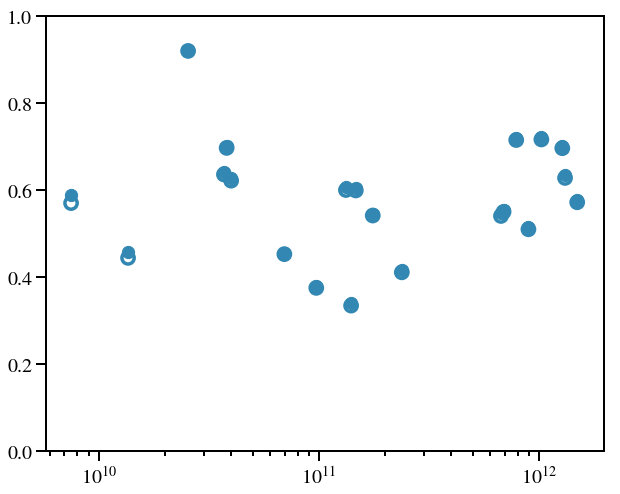

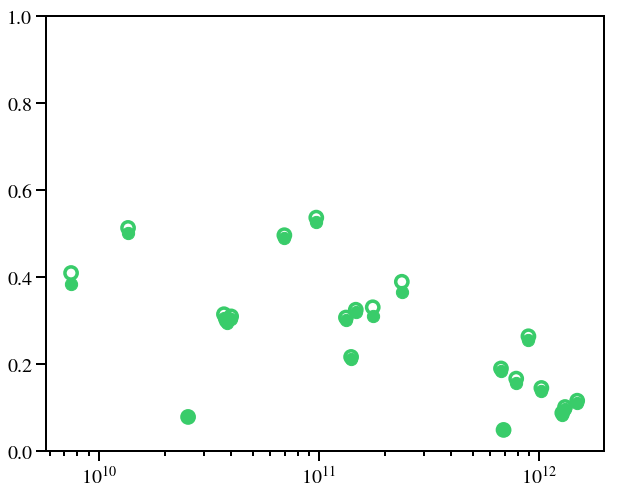

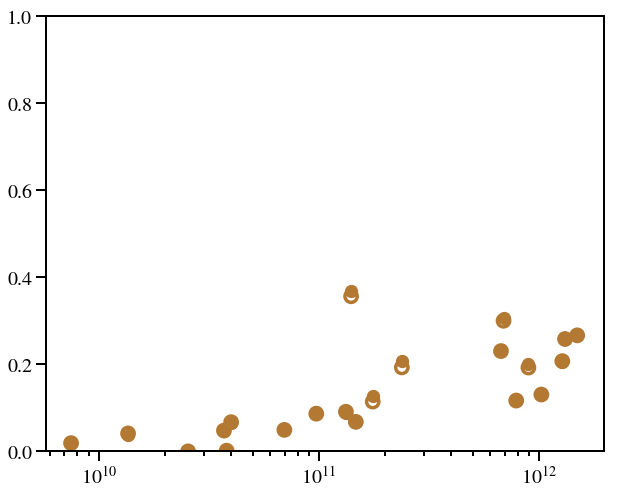

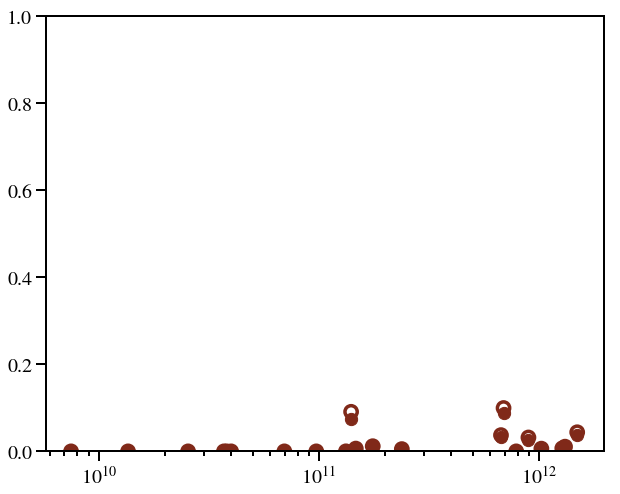

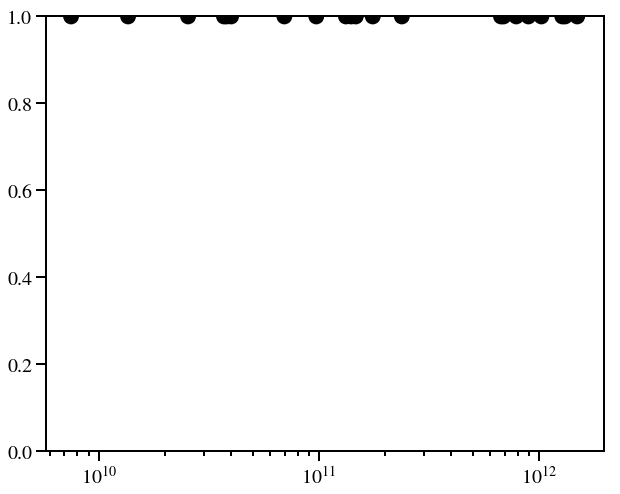

In [48]:
if compare_classification_scheme:
    
    comp_classifications = [
        'is_CGM_NEP',
        'is_CGM_IP',
        'is_CGM_EP',
        'is_CGM_satellite',
        'is_in_CGM',
    ]
    
    for key, comp_key in zip( classifications, comp_classifications ):

        fig = plt.figure( figsize=(10,8), facecolor='w' )
        ax = plt.gca()

        ax.scatter(
            halo_masses.array(),
            CGM_mass_fractions[key].array(),
            color = p_constants.CLASSIFICATION_COLORS_B[key],
            s = 150,
        )

        ax.scatter(
            halo_masses.array(),
            CGM_mass_frac_comp[comp_key].array(),
            color = p_constants.CLASSIFICATION_COLORS_B[key],
            s = 150,
            facecolor = 'none',
            linewidth = 3.5,
        )

        ax.set_xscale( 'log' )

        ax.set_ylim( 0, 1 )